In [15]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from ipywidgets import interact
from sklearn.preprocessing import MinMaxScaler
from tensorflow import keras as ks
#from keras.models import Sequential
#from keras.layers import Dense

#from keras.constraints import maxnorm
#from keras.layers import Dropout
#from keras.optimizers import Adamax

In [16]:
%ls

backup_data/  Bk0.2New.h5   data_read2.py                index  k1.5/
BEmu.ipynb    bkkkk0.3.h5   data_read.py                 k0.2/  Testing.ipynb
bk0.21.h5     cov_inv_test  hypertraining-neurons.ipynb  k0.3/


In [17]:
path = '/home/ht/EmuPBk/data/data_Bispectrum/k0.3/'

In [18]:
ind= np.loadtxt('index')
index = np.zeros(len(ind),dtype=int)
for i in range(len(ind)):
    index[i] = ind[i]
index

array([ 146,  833,  516,  204,  929,  223,  154,   42,   87,   10,  535,
        343,  525,  239,   37,  532,  966, 1043])

In [19]:
Bk = np.loadtxt(path+'bk_norm03')
params = np.loadtxt(path+'params03')

In [21]:
Bk = np.around(Bk,1)

In [22]:
Bk_03_test = Bk[index]

Bk_03_train = np.delete(Bk,index,axis=0)

Bk_03_train = Bk_03_train

params_test = params[index]

params_train = np.delete(params,index,axis=0)

params_train = params_train

In [23]:
Bk_03_train.shape

(1040, 550)

In [24]:
Bk_03_train = Bk_03_train/10000.


In [26]:

class myCallback(ks.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy')>=0.96):
            print("\nReached 96% accuracy so cancelling training!")
            self.model.stop_training = True
callbacks = myCallback()
model = ks.models.Sequential()
Dense = ks.layers.Dense
model.add(Dense(80,input_shape=[3,],activation='elu'))
model.add(Dense(320,activation='elu'))
model.add(Dense(460,activation='elu'))
model.add(Dense(560,activation='elu'))
model.add(Dense(260,activation='elu'))
model.add(Dense(100,activation='elu'))
#model.add(Dense(450,activation='elu'))

#model.add(Dense(750,activation='elu'))
model.add(Dense(550))

optimizer = ks.optimizers.Adamax(lr = 0.0001,beta_1=0.2,beta_2=0.088)   
model.compile(loss='mse', optimizer= optimizer, metrics=['accuracy'],)
history = model.fit(params_train,Bk_03_train,validation_split=0.038,epochs=5000,batch_size=10,callbacks=[callbacks])

Train on 1000 samples, validate on 40 samples
Epoch 1/5000
1000/1000 [==============================] - 1s 683us/sample - loss: 0.8918 - accuracy: 0.1510 - val_loss: 0.1196 - val_accuracy: 0.3000
Epoch 2/5000
1000/1000 [==============================] - 0s 386us/sample - loss: 0.0923 - accuracy: 0.6620 - val_loss: 0.0630 - val_accuracy: 0.7250
Epoch 3/5000
1000/1000 [==============================] - 0s 388us/sample - loss: 0.0596 - accuracy: 0.6870 - val_loss: 0.0577 - val_accuracy: 0.6750
Epoch 4/5000
1000/1000 [==============================] - 0s 393us/sample - loss: 0.0452 - accuracy: 0.6810 - val_loss: 0.0554 - val_accuracy: 0.6750
Epoch 5/5000
1000/1000 [==============================] - 0s 384us/sample - loss: 0.0455 - accuracy: 0.6780 - val_loss: 0.0638 - val_accuracy: 0.7250
Epoch 6/5000
1000/1000 [==============================] - 0s 390us/sample - loss: 0.0475 - accuracy: 0.6830 - val_loss: 0.0562 - val_accuracy: 0.7000
Epoch 7/5000
1000/1000 [==============================

1000/1000 [==============================] - 0s 430us/sample - loss: 0.0088 - accuracy: 0.8230 - val_loss: 0.0179 - val_accuracy: 0.7750
Epoch 56/5000
1000/1000 [==============================] - 0s 424us/sample - loss: 0.0085 - accuracy: 0.8050 - val_loss: 0.0091 - val_accuracy: 0.8750
Epoch 57/5000
1000/1000 [==============================] - 0s 421us/sample - loss: 0.0077 - accuracy: 0.8220 - val_loss: 0.0080 - val_accuracy: 0.8500
Epoch 58/5000
1000/1000 [==============================] - 0s 420us/sample - loss: 0.0121 - accuracy: 0.8140 - val_loss: 0.0137 - val_accuracy: 0.8500
Epoch 59/5000
1000/1000 [==============================] - 0s 420us/sample - loss: 0.0099 - accuracy: 0.8090 - val_loss: 0.0114 - val_accuracy: 0.8500
Epoch 60/5000
1000/1000 [==============================] - 0s 421us/sample - loss: 0.0104 - accuracy: 0.8110 - val_loss: 0.0152 - val_accuracy: 0.8250
Epoch 61/5000
1000/1000 [==============================] - 0s 420us/sample - loss: 0.0116 - accuracy: 0.8130

1000/1000 [==============================] - 0s 428us/sample - loss: 0.0077 - accuracy: 0.8300 - val_loss: 0.0121 - val_accuracy: 0.8250
Epoch 110/5000
1000/1000 [==============================] - 0s 422us/sample - loss: 0.0076 - accuracy: 0.8410 - val_loss: 0.0074 - val_accuracy: 0.8750
Epoch 111/5000
1000/1000 [==============================] - 0s 423us/sample - loss: 0.0060 - accuracy: 0.8540 - val_loss: 0.0139 - val_accuracy: 0.8250
Epoch 112/5000
1000/1000 [==============================] - 0s 417us/sample - loss: 0.0050 - accuracy: 0.8580 - val_loss: 0.0099 - val_accuracy: 0.8750
Epoch 113/5000
1000/1000 [==============================] - 0s 430us/sample - loss: 0.0096 - accuracy: 0.8370 - val_loss: 0.0072 - val_accuracy: 0.8000
Epoch 114/5000
1000/1000 [==============================] - 0s 447us/sample - loss: 0.0069 - accuracy: 0.8630 - val_loss: 0.0108 - val_accuracy: 0.8000
Epoch 115/5000
1000/1000 [==============================] - 0s 439us/sample - loss: 0.0067 - accuracy: 

Epoch 163/5000
1000/1000 [==============================] - 0s 426us/sample - loss: 0.0039 - accuracy: 0.8750 - val_loss: 0.0045 - val_accuracy: 0.8500
Epoch 164/5000
1000/1000 [==============================] - 0s 439us/sample - loss: 0.0039 - accuracy: 0.8820 - val_loss: 0.0053 - val_accuracy: 0.9000
Epoch 165/5000
1000/1000 [==============================] - 0s 439us/sample - loss: 0.0046 - accuracy: 0.8770 - val_loss: 0.0066 - val_accuracy: 0.8500
Epoch 166/5000
1000/1000 [==============================] - 0s 438us/sample - loss: 0.0040 - accuracy: 0.8750 - val_loss: 0.0065 - val_accuracy: 0.8250
Epoch 167/5000
1000/1000 [==============================] - 0s 443us/sample - loss: 0.0038 - accuracy: 0.8640 - val_loss: 0.0080 - val_accuracy: 0.8250
Epoch 168/5000
1000/1000 [==============================] - 0s 436us/sample - loss: 0.0040 - accuracy: 0.8800 - val_loss: 0.0051 - val_accuracy: 0.8500
Epoch 169/5000
1000/1000 [==============================] - 0s 430us/sample - loss: 0.00

Epoch 217/5000
1000/1000 [==============================] - 0s 420us/sample - loss: 0.0036 - accuracy: 0.8720 - val_loss: 0.0055 - val_accuracy: 0.8500
Epoch 218/5000
1000/1000 [==============================] - 0s 399us/sample - loss: 0.0043 - accuracy: 0.8800 - val_loss: 0.0039 - val_accuracy: 0.9000
Epoch 219/5000
1000/1000 [==============================] - 0s 395us/sample - loss: 0.0033 - accuracy: 0.8830 - val_loss: 0.0079 - val_accuracy: 0.9250
Epoch 220/5000
1000/1000 [==============================] - 0s 400us/sample - loss: 0.0036 - accuracy: 0.8820 - val_loss: 0.0042 - val_accuracy: 0.9000
Epoch 221/5000
1000/1000 [==============================] - 0s 404us/sample - loss: 0.0047 - accuracy: 0.8720 - val_loss: 0.0046 - val_accuracy: 0.8750
Epoch 222/5000
1000/1000 [==============================] - 0s 403us/sample - loss: 0.0075 - accuracy: 0.8720 - val_loss: 0.0037 - val_accuracy: 0.8750
Epoch 223/5000
1000/1000 [==============================] - 0s 399us/sample - loss: 0.00

Epoch 271/5000
1000/1000 [==============================] - 0s 406us/sample - loss: 0.0031 - accuracy: 0.8910 - val_loss: 0.0047 - val_accuracy: 0.8750
Epoch 272/5000
1000/1000 [==============================] - 0s 404us/sample - loss: 0.0049 - accuracy: 0.8860 - val_loss: 0.0034 - val_accuracy: 0.9000
Epoch 273/5000
1000/1000 [==============================] - 0s 402us/sample - loss: 0.0045 - accuracy: 0.8760 - val_loss: 0.0035 - val_accuracy: 0.8750
Epoch 274/5000
1000/1000 [==============================] - 0s 403us/sample - loss: 0.0036 - accuracy: 0.8710 - val_loss: 0.0036 - val_accuracy: 0.8750
Epoch 275/5000
1000/1000 [==============================] - 0s 394us/sample - loss: 0.0027 - accuracy: 0.8820 - val_loss: 0.0295 - val_accuracy: 0.8500
Epoch 276/5000
1000/1000 [==============================] - 0s 405us/sample - loss: 0.0034 - accuracy: 0.8760 - val_loss: 0.0035 - val_accuracy: 0.9000
Epoch 277/5000
1000/1000 [==============================] - 0s 420us/sample - loss: 0.00

Epoch 325/5000
1000/1000 [==============================] - 0s 391us/sample - loss: 0.0030 - accuracy: 0.8950 - val_loss: 0.0025 - val_accuracy: 0.9250
Epoch 326/5000
1000/1000 [==============================] - 0s 401us/sample - loss: 0.0032 - accuracy: 0.8920 - val_loss: 0.0049 - val_accuracy: 0.9000
Epoch 327/5000
1000/1000 [==============================] - 0s 406us/sample - loss: 0.0033 - accuracy: 0.8970 - val_loss: 0.0033 - val_accuracy: 0.9250
Epoch 328/5000
1000/1000 [==============================] - 0s 394us/sample - loss: 0.0024 - accuracy: 0.8900 - val_loss: 0.0021 - val_accuracy: 0.9500
Epoch 329/5000
1000/1000 [==============================] - 0s 414us/sample - loss: 0.0024 - accuracy: 0.9130 - val_loss: 0.0025 - val_accuracy: 0.9500
Epoch 330/5000
1000/1000 [==============================] - 0s 407us/sample - loss: 0.0034 - accuracy: 0.8930 - val_loss: 0.0076 - val_accuracy: 0.9250
Epoch 331/5000
1000/1000 [==============================] - 0s 397us/sample - loss: 0.00

Epoch 379/5000
1000/1000 [==============================] - 0s 398us/sample - loss: 0.0030 - accuracy: 0.9020 - val_loss: 0.0047 - val_accuracy: 0.9250
Epoch 380/5000
1000/1000 [==============================] - 0s 403us/sample - loss: 0.0030 - accuracy: 0.9030 - val_loss: 0.0049 - val_accuracy: 0.8750
Epoch 381/5000
1000/1000 [==============================] - 0s 389us/sample - loss: 0.0028 - accuracy: 0.8850 - val_loss: 0.0041 - val_accuracy: 0.9000
Epoch 382/5000
1000/1000 [==============================] - 0s 391us/sample - loss: 0.0022 - accuracy: 0.9060 - val_loss: 0.0053 - val_accuracy: 0.8750
Epoch 383/5000
1000/1000 [==============================] - 0s 405us/sample - loss: 0.0026 - accuracy: 0.9050 - val_loss: 0.0032 - val_accuracy: 0.8750
Epoch 384/5000
1000/1000 [==============================] - 0s 411us/sample - loss: 0.0027 - accuracy: 0.8910 - val_loss: 0.0022 - val_accuracy: 0.9000
Epoch 385/5000
1000/1000 [==============================] - 0s 406us/sample - loss: 0.00

Epoch 433/5000
1000/1000 [==============================] - 0s 381us/sample - loss: 0.0021 - accuracy: 0.9080 - val_loss: 0.0035 - val_accuracy: 0.9000
Epoch 434/5000
1000/1000 [==============================] - 0s 383us/sample - loss: 0.0024 - accuracy: 0.9090 - val_loss: 0.0023 - val_accuracy: 0.9250
Epoch 435/5000
1000/1000 [==============================] - 0s 382us/sample - loss: 0.0021 - accuracy: 0.8890 - val_loss: 0.0020 - val_accuracy: 0.9250
Epoch 436/5000
1000/1000 [==============================] - 0s 382us/sample - loss: 0.0021 - accuracy: 0.9050 - val_loss: 0.0057 - val_accuracy: 0.8750
Epoch 437/5000
1000/1000 [==============================] - 0s 383us/sample - loss: 0.0019 - accuracy: 0.8990 - val_loss: 0.0046 - val_accuracy: 0.9000
Epoch 438/5000
1000/1000 [==============================] - 0s 383us/sample - loss: 0.0022 - accuracy: 0.8860 - val_loss: 0.0035 - val_accuracy: 0.9000
Epoch 439/5000
1000/1000 [==============================] - 0s 379us/sample - loss: 0.00

Epoch 487/5000
1000/1000 [==============================] - 0s 383us/sample - loss: 0.0022 - accuracy: 0.9130 - val_loss: 0.0016 - val_accuracy: 0.9250
Epoch 488/5000
1000/1000 [==============================] - 0s 383us/sample - loss: 0.0026 - accuracy: 0.9170 - val_loss: 0.0018 - val_accuracy: 0.8750
Epoch 489/5000
1000/1000 [==============================] - 0s 385us/sample - loss: 0.0022 - accuracy: 0.9160 - val_loss: 0.0024 - val_accuracy: 0.8500
Epoch 490/5000
1000/1000 [==============================] - 0s 383us/sample - loss: 0.0036 - accuracy: 0.8980 - val_loss: 0.0027 - val_accuracy: 0.9250
Epoch 491/5000
1000/1000 [==============================] - 0s 382us/sample - loss: 0.0024 - accuracy: 0.8990 - val_loss: 0.0022 - val_accuracy: 0.8750
Epoch 492/5000
1000/1000 [==============================] - 0s 380us/sample - loss: 0.0017 - accuracy: 0.9220 - val_loss: 0.0039 - val_accuracy: 0.9000
Epoch 493/5000
1000/1000 [==============================] - 0s 385us/sample - loss: 0.00

Epoch 541/5000
1000/1000 [==============================] - 0s 381us/sample - loss: 0.0030 - accuracy: 0.9110 - val_loss: 0.0031 - val_accuracy: 0.9000
Epoch 542/5000
1000/1000 [==============================] - 0s 383us/sample - loss: 0.0033 - accuracy: 0.9090 - val_loss: 0.0018 - val_accuracy: 0.9000
Epoch 543/5000
1000/1000 [==============================] - 0s 382us/sample - loss: 0.0018 - accuracy: 0.9110 - val_loss: 0.0052 - val_accuracy: 0.9000
Epoch 544/5000
1000/1000 [==============================] - 0s 384us/sample - loss: 0.0019 - accuracy: 0.9140 - val_loss: 0.0017 - val_accuracy: 0.8750
Epoch 545/5000
1000/1000 [==============================] - 0s 382us/sample - loss: 0.0019 - accuracy: 0.9140 - val_loss: 0.0017 - val_accuracy: 0.9000
Epoch 546/5000
1000/1000 [==============================] - 0s 381us/sample - loss: 0.0018 - accuracy: 0.9000 - val_loss: 0.0038 - val_accuracy: 0.9250
Epoch 547/5000
1000/1000 [==============================] - 0s 382us/sample - loss: 0.00

Epoch 595/5000
1000/1000 [==============================] - 0s 388us/sample - loss: 0.0017 - accuracy: 0.9240 - val_loss: 0.0028 - val_accuracy: 0.9000
Epoch 596/5000
1000/1000 [==============================] - 0s 387us/sample - loss: 0.0020 - accuracy: 0.9300 - val_loss: 0.0044 - val_accuracy: 0.9000
Epoch 597/5000
1000/1000 [==============================] - 0s 421us/sample - loss: 0.0018 - accuracy: 0.8980 - val_loss: 0.0038 - val_accuracy: 0.9000
Epoch 598/5000
1000/1000 [==============================] - 0s 399us/sample - loss: 0.0027 - accuracy: 0.9090 - val_loss: 0.0023 - val_accuracy: 0.9250
Epoch 599/5000
1000/1000 [==============================] - 0s 391us/sample - loss: 0.0017 - accuracy: 0.9150 - val_loss: 0.0018 - val_accuracy: 0.9500
Epoch 600/5000
1000/1000 [==============================] - 0s 396us/sample - loss: 0.0020 - accuracy: 0.9070 - val_loss: 0.0024 - val_accuracy: 0.9000
Epoch 601/5000
1000/1000 [==============================] - 0s 394us/sample - loss: 0.00

Epoch 649/5000
1000/1000 [==============================] - 0s 403us/sample - loss: 0.0031 - accuracy: 0.9150 - val_loss: 0.0045 - val_accuracy: 0.8750
Epoch 650/5000
1000/1000 [==============================] - 0s 394us/sample - loss: 0.0023 - accuracy: 0.9110 - val_loss: 0.0023 - val_accuracy: 0.9000
Epoch 651/5000
1000/1000 [==============================] - 0s 397us/sample - loss: 0.0021 - accuracy: 0.9080 - val_loss: 0.0022 - val_accuracy: 0.8750
Epoch 652/5000
1000/1000 [==============================] - 0s 404us/sample - loss: 0.0019 - accuracy: 0.9170 - val_loss: 0.0019 - val_accuracy: 0.8750
Epoch 653/5000
1000/1000 [==============================] - 0s 405us/sample - loss: 0.0018 - accuracy: 0.9180 - val_loss: 0.0026 - val_accuracy: 0.8750
Epoch 654/5000
1000/1000 [==============================] - 0s 402us/sample - loss: 0.0016 - accuracy: 0.9160 - val_loss: 0.0029 - val_accuracy: 0.9000
Epoch 655/5000
1000/1000 [==============================] - 0s 393us/sample - loss: 0.00

Epoch 703/5000
1000/1000 [==============================] - 0s 395us/sample - loss: 0.0014 - accuracy: 0.9230 - val_loss: 0.0035 - val_accuracy: 0.8750
Epoch 704/5000
1000/1000 [==============================] - 0s 401us/sample - loss: 0.0016 - accuracy: 0.9300 - val_loss: 0.0018 - val_accuracy: 0.9000
Epoch 705/5000
1000/1000 [==============================] - 0s 404us/sample - loss: 0.0020 - accuracy: 0.9200 - val_loss: 0.0027 - val_accuracy: 0.9000
Epoch 706/5000
1000/1000 [==============================] - 0s 392us/sample - loss: 0.0018 - accuracy: 0.9290 - val_loss: 0.0030 - val_accuracy: 0.8500
Epoch 707/5000
1000/1000 [==============================] - 0s 401us/sample - loss: 0.0013 - accuracy: 0.9240 - val_loss: 0.0044 - val_accuracy: 0.8500
Epoch 708/5000
1000/1000 [==============================] - 0s 390us/sample - loss: 0.0022 - accuracy: 0.9230 - val_loss: 0.0021 - val_accuracy: 0.8750
Epoch 709/5000
1000/1000 [==============================] - 0s 397us/sample - loss: 0.00

Epoch 757/5000
1000/1000 [==============================] - 0s 403us/sample - loss: 0.0012 - accuracy: 0.9270 - val_loss: 0.0024 - val_accuracy: 0.9250
Epoch 758/5000
1000/1000 [==============================] - 0s 389us/sample - loss: 0.0016 - accuracy: 0.9190 - val_loss: 0.0091 - val_accuracy: 0.9250
Epoch 759/5000
1000/1000 [==============================] - 0s 388us/sample - loss: 0.0016 - accuracy: 0.9260 - val_loss: 0.0013 - val_accuracy: 0.9000
Epoch 760/5000
1000/1000 [==============================] - 0s 392us/sample - loss: 0.0014 - accuracy: 0.9280 - val_loss: 0.0014 - val_accuracy: 0.8500
Epoch 761/5000
1000/1000 [==============================] - 0s 390us/sample - loss: 0.0019 - accuracy: 0.9130 - val_loss: 0.0016 - val_accuracy: 0.9000
Epoch 762/5000
1000/1000 [==============================] - 0s 387us/sample - loss: 0.0025 - accuracy: 0.9180 - val_loss: 0.0159 - val_accuracy: 0.8750
Epoch 763/5000
1000/1000 [==============================] - 0s 391us/sample - loss: 0.00

Epoch 811/5000
1000/1000 [==============================] - 0s 383us/sample - loss: 0.0018 - accuracy: 0.9380 - val_loss: 0.0011 - val_accuracy: 0.9250
Epoch 812/5000
1000/1000 [==============================] - 0s 387us/sample - loss: 0.0011 - accuracy: 0.9250 - val_loss: 0.0024 - val_accuracy: 0.9500
Epoch 813/5000
1000/1000 [==============================] - 0s 385us/sample - loss: 0.0014 - accuracy: 0.9260 - val_loss: 0.0012 - val_accuracy: 0.9250
Epoch 814/5000
1000/1000 [==============================] - 0s 383us/sample - loss: 0.0014 - accuracy: 0.9210 - val_loss: 0.0024 - val_accuracy: 0.9250
Epoch 815/5000
1000/1000 [==============================] - 0s 384us/sample - loss: 0.0014 - accuracy: 0.9260 - val_loss: 0.0033 - val_accuracy: 0.9250
Epoch 816/5000
1000/1000 [==============================] - 0s 390us/sample - loss: 0.0017 - accuracy: 0.9160 - val_loss: 0.0020 - val_accuracy: 0.9250
Epoch 817/5000
1000/1000 [==============================] - 0s 385us/sample - loss: 0.00

Epoch 865/5000
1000/1000 [==============================] - 0s 397us/sample - loss: 0.0011 - accuracy: 0.9290 - val_loss: 0.0020 - val_accuracy: 0.9500
Epoch 866/5000
1000/1000 [==============================] - 0s 391us/sample - loss: 0.0012 - accuracy: 0.9390 - val_loss: 0.0013 - val_accuracy: 0.9250
Epoch 867/5000
1000/1000 [==============================] - 0s 430us/sample - loss: 0.0013 - accuracy: 0.9300 - val_loss: 0.0022 - val_accuracy: 0.9500
Epoch 868/5000
1000/1000 [==============================] - 0s 444us/sample - loss: 0.0012 - accuracy: 0.9130 - val_loss: 0.0016 - val_accuracy: 0.9000
Epoch 869/5000
1000/1000 [==============================] - 0s 435us/sample - loss: 0.0015 - accuracy: 0.9210 - val_loss: 0.0065 - val_accuracy: 0.9500
Epoch 870/5000
1000/1000 [==============================] - 0s 407us/sample - loss: 0.0020 - accuracy: 0.9180 - val_loss: 0.0013 - val_accuracy: 0.8750
Epoch 871/5000
1000/1000 [==============================] - 0s 397us/sample - loss: 0.00

1000/1000 [==============================] - 0s 397us/sample - loss: 0.0011 - accuracy: 0.9270 - val_loss: 0.0020 - val_accuracy: 0.9500
Epoch 919/5000
1000/1000 [==============================] - 0s 392us/sample - loss: 0.0016 - accuracy: 0.9260 - val_loss: 9.9549e-04 - val_accuracy: 0.9250
Epoch 920/5000
1000/1000 [==============================] - 0s 400us/sample - loss: 0.0011 - accuracy: 0.9180 - val_loss: 0.0013 - val_accuracy: 0.9500
Epoch 921/5000
1000/1000 [==============================] - 0s 406us/sample - loss: 0.0012 - accuracy: 0.9310 - val_loss: 0.0036 - val_accuracy: 0.9000
Epoch 922/5000
1000/1000 [==============================] - 0s 403us/sample - loss: 0.0011 - accuracy: 0.9310 - val_loss: 0.0016 - val_accuracy: 0.9500
Epoch 923/5000
1000/1000 [==============================] - 0s 398us/sample - loss: 0.0010 - accuracy: 0.9300 - val_loss: 0.0023 - val_accuracy: 0.9500
Epoch 924/5000
1000/1000 [==============================] - 0s 393us/sample - loss: 0.0011 - accura

1000/1000 [==============================] - 0s 473us/sample - loss: 0.0013 - accuracy: 0.9380 - val_loss: 0.0020 - val_accuracy: 0.9000
Epoch 972/5000
1000/1000 [==============================] - 0s 449us/sample - loss: 0.0015 - accuracy: 0.9340 - val_loss: 0.0039 - val_accuracy: 0.9000
Epoch 973/5000
1000/1000 [==============================] - 0s 435us/sample - loss: 0.0019 - accuracy: 0.9200 - val_loss: 0.0033 - val_accuracy: 0.9250
Epoch 974/5000
1000/1000 [==============================] - 0s 479us/sample - loss: 9.6671e-04 - accuracy: 0.9480 - val_loss: 0.0042 - val_accuracy: 0.9500
Epoch 975/5000
1000/1000 [==============================] - 0s 428us/sample - loss: 0.0012 - accuracy: 0.9350 - val_loss: 0.0017 - val_accuracy: 0.9500
Epoch 976/5000
1000/1000 [==============================] - 0s 439us/sample - loss: 0.0014 - accuracy: 0.9300 - val_loss: 0.0013 - val_accuracy: 0.8750
Epoch 977/5000
1000/1000 [==============================] - 0s 443us/sample - loss: 0.0034 - accura

1000/1000 [==============================] - 0s 450us/sample - loss: 7.7945e-04 - accuracy: 0.9340 - val_loss: 0.0013 - val_accuracy: 0.9250
Epoch 1025/5000
1000/1000 [==============================] - 0s 438us/sample - loss: 0.0013 - accuracy: 0.9230 - val_loss: 0.0023 - val_accuracy: 0.9500
Epoch 1026/5000
1000/1000 [==============================] - 0s 422us/sample - loss: 0.0013 - accuracy: 0.9470 - val_loss: 0.0011 - val_accuracy: 0.9000
Epoch 1027/5000
1000/1000 [==============================] - 0s 441us/sample - loss: 0.0010 - accuracy: 0.9360 - val_loss: 0.0015 - val_accuracy: 0.9250
Epoch 1028/5000
1000/1000 [==============================] - 0s 442us/sample - loss: 8.4500e-04 - accuracy: 0.9320 - val_loss: 0.0039 - val_accuracy: 0.8750
Epoch 1029/5000
1000/1000 [==============================] - 0s 442us/sample - loss: 0.0011 - accuracy: 0.9400 - val_loss: 0.0021 - val_accuracy: 0.9250
Epoch 1030/5000
1000/1000 [==============================] - 0s 496us/sample - loss: 0.001

1000/1000 [==============================] - 0s 420us/sample - loss: 9.5951e-04 - accuracy: 0.9290 - val_loss: 0.0017 - val_accuracy: 0.9750
Epoch 1078/5000
1000/1000 [==============================] - 0s 453us/sample - loss: 9.7359e-04 - accuracy: 0.9410 - val_loss: 0.0012 - val_accuracy: 0.9250
Epoch 1079/5000
1000/1000 [==============================] - 0s 467us/sample - loss: 9.8284e-04 - accuracy: 0.9320 - val_loss: 0.0020 - val_accuracy: 0.9250
Epoch 1080/5000
1000/1000 [==============================] - 0s 456us/sample - loss: 0.0010 - accuracy: 0.9340 - val_loss: 0.0029 - val_accuracy: 0.9250
Epoch 1081/5000
1000/1000 [==============================] - 1s 502us/sample - loss: 0.0017 - accuracy: 0.9180 - val_loss: 0.0013 - val_accuracy: 0.9250
Epoch 1082/5000
1000/1000 [==============================] - 0s 433us/sample - loss: 0.0018 - accuracy: 0.9320 - val_loss: 0.0010 - val_accuracy: 0.9250
Epoch 1083/5000
1000/1000 [==============================] - 0s 433us/sample - loss: 0

Epoch 1130/5000
1000/1000 [==============================] - 0s 422us/sample - loss: 8.8545e-04 - accuracy: 0.9430 - val_loss: 6.7044e-04 - val_accuracy: 0.9500
Epoch 1131/5000
1000/1000 [==============================] - 0s 415us/sample - loss: 0.0012 - accuracy: 0.9280 - val_loss: 0.0021 - val_accuracy: 0.9500
Epoch 1132/5000
1000/1000 [==============================] - 0s 427us/sample - loss: 0.0011 - accuracy: 0.9180 - val_loss: 9.0428e-04 - val_accuracy: 0.9750
Epoch 1133/5000
1000/1000 [==============================] - 0s 435us/sample - loss: 8.8034e-04 - accuracy: 0.9440 - val_loss: 9.4442e-04 - val_accuracy: 0.9750
Epoch 1134/5000
1000/1000 [==============================] - 0s 421us/sample - loss: 8.7543e-04 - accuracy: 0.9320 - val_loss: 0.0016 - val_accuracy: 0.9250
Epoch 1135/5000
1000/1000 [==============================] - 0s 416us/sample - loss: 8.6511e-04 - accuracy: 0.9280 - val_loss: 0.0012 - val_accuracy: 0.9500
Epoch 1136/5000
1000/1000 [===========================

1000/1000 [==============================] - 0s 392us/sample - loss: 8.4906e-04 - accuracy: 0.9360 - val_loss: 0.0011 - val_accuracy: 0.9250
Epoch 1183/5000
1000/1000 [==============================] - 0s 393us/sample - loss: 8.8944e-04 - accuracy: 0.9400 - val_loss: 0.0019 - val_accuracy: 0.9000
Epoch 1184/5000
1000/1000 [==============================] - 0s 392us/sample - loss: 9.4352e-04 - accuracy: 0.9390 - val_loss: 0.0017 - val_accuracy: 0.9000
Epoch 1185/5000
1000/1000 [==============================] - 0s 396us/sample - loss: 0.0012 - accuracy: 0.9340 - val_loss: 9.7912e-04 - val_accuracy: 0.9500
Epoch 1186/5000
1000/1000 [==============================] - 0s 391us/sample - loss: 6.7422e-04 - accuracy: 0.9390 - val_loss: 0.0015 - val_accuracy: 0.9500
Epoch 1187/5000
1000/1000 [==============================] - 0s 392us/sample - loss: 0.0011 - accuracy: 0.9310 - val_loss: 0.0011 - val_accuracy: 0.9500
Epoch 1188/5000
1000/1000 [==============================] - 0s 392us/sample -

Epoch 1235/5000
1000/1000 [==============================] - 0s 385us/sample - loss: 9.5177e-04 - accuracy: 0.9330 - val_loss: 0.0012 - val_accuracy: 0.8750
Epoch 1236/5000
1000/1000 [==============================] - 0s 383us/sample - loss: 0.0012 - accuracy: 0.9350 - val_loss: 0.0017 - val_accuracy: 0.9500
Epoch 1237/5000
1000/1000 [==============================] - 0s 385us/sample - loss: 9.3651e-04 - accuracy: 0.9310 - val_loss: 9.3095e-04 - val_accuracy: 0.9000
Epoch 1238/5000
1000/1000 [==============================] - 0s 386us/sample - loss: 9.6617e-04 - accuracy: 0.9440 - val_loss: 0.0020 - val_accuracy: 0.9000
Epoch 1239/5000
1000/1000 [==============================] - 0s 384us/sample - loss: 9.8291e-04 - accuracy: 0.9410 - val_loss: 0.0022 - val_accuracy: 0.9500
Epoch 1240/5000
1000/1000 [==============================] - 0s 385us/sample - loss: 8.0114e-04 - accuracy: 0.9280 - val_loss: 0.0011 - val_accuracy: 0.9500
Epoch 1241/5000
1000/1000 [==============================]

1000/1000 [==============================] - 0s 383us/sample - loss: 6.9890e-04 - accuracy: 0.9390 - val_loss: 0.0010 - val_accuracy: 0.8750
Epoch 1288/5000
1000/1000 [==============================] - 0s 386us/sample - loss: 7.7961e-04 - accuracy: 0.9410 - val_loss: 0.0022 - val_accuracy: 0.9250
Epoch 1289/5000
1000/1000 [==============================] - 0s 382us/sample - loss: 8.4230e-04 - accuracy: 0.9540 - val_loss: 0.0022 - val_accuracy: 0.8750
Epoch 1290/5000
1000/1000 [==============================] - 0s 386us/sample - loss: 0.0011 - accuracy: 0.9400 - val_loss: 0.0022 - val_accuracy: 0.9250
Epoch 1291/5000
1000/1000 [==============================] - 0s 385us/sample - loss: 9.4724e-04 - accuracy: 0.9420 - val_loss: 0.0018 - val_accuracy: 0.9250
Epoch 1292/5000
1000/1000 [==============================] - 0s 381us/sample - loss: 8.8634e-04 - accuracy: 0.9450 - val_loss: 0.0010 - val_accuracy: 0.9500
Epoch 1293/5000
1000/1000 [==============================] - 0s 383us/sample -

1000/1000 [==============================] - 0s 388us/sample - loss: 7.5862e-04 - accuracy: 0.9530 - val_loss: 0.0010 - val_accuracy: 0.9500
Epoch 1340/5000
1000/1000 [==============================] - 0s 384us/sample - loss: 6.3654e-04 - accuracy: 0.9510 - val_loss: 0.0010 - val_accuracy: 0.9000
Epoch 1341/5000
1000/1000 [==============================] - 0s 386us/sample - loss: 7.3384e-04 - accuracy: 0.9480 - val_loss: 0.0011 - val_accuracy: 0.9500
Epoch 1342/5000
1000/1000 [==============================] - 0s 384us/sample - loss: 8.6058e-04 - accuracy: 0.9400 - val_loss: 0.0016 - val_accuracy: 0.9250
Epoch 1343/5000
1000/1000 [==============================] - 0s 382us/sample - loss: 0.0011 - accuracy: 0.9460 - val_loss: 0.0019 - val_accuracy: 0.9500
Epoch 1344/5000
1000/1000 [==============================] - 0s 386us/sample - loss: 7.4200e-04 - accuracy: 0.9520 - val_loss: 8.3771e-04 - val_accuracy: 0.9250
Epoch 1345/5000
1000/1000 [==============================] - 0s 390us/samp

1000/1000 [==============================] - 0s 388us/sample - loss: 0.0012 - accuracy: 0.9390 - val_loss: 9.7314e-04 - val_accuracy: 0.9750
Epoch 1392/5000
1000/1000 [==============================] - 0s 383us/sample - loss: 8.6666e-04 - accuracy: 0.9400 - val_loss: 0.0011 - val_accuracy: 0.8750
Epoch 1393/5000
1000/1000 [==============================] - 0s 383us/sample - loss: 8.9670e-04 - accuracy: 0.9480 - val_loss: 0.0012 - val_accuracy: 0.9250
Epoch 1394/5000
1000/1000 [==============================] - 0s 385us/sample - loss: 7.1877e-04 - accuracy: 0.9420 - val_loss: 7.0904e-04 - val_accuracy: 0.9750
Epoch 1395/5000
1000/1000 [==============================] - 0s 382us/sample - loss: 5.3432e-04 - accuracy: 0.9470 - val_loss: 0.0013 - val_accuracy: 0.9750
Epoch 1396/5000
1000/1000 [==============================] - 0s 383us/sample - loss: 6.4494e-04 - accuracy: 0.9510 - val_loss: 0.0021 - val_accuracy: 0.9250
Epoch 1397/5000
1000/1000 [==============================] - 0s 385us/

1000/1000 [==============================] - 1s 505us/sample - loss: 7.7843e-04 - accuracy: 0.9400 - val_loss: 0.0024 - val_accuracy: 0.9000
Epoch 1444/5000
1000/1000 [==============================] - 0s 452us/sample - loss: 6.4694e-04 - accuracy: 0.9450 - val_loss: 0.0016 - val_accuracy: 0.9250
Epoch 1445/5000
1000/1000 [==============================] - 0s 472us/sample - loss: 8.3700e-04 - accuracy: 0.9400 - val_loss: 0.0011 - val_accuracy: 0.9250
Epoch 1446/5000
1000/1000 [==============================] - 0s 491us/sample - loss: 5.5718e-04 - accuracy: 0.9450 - val_loss: 0.0011 - val_accuracy: 0.9500
Epoch 1447/5000
1000/1000 [==============================] - 0s 484us/sample - loss: 7.3469e-04 - accuracy: 0.9420 - val_loss: 0.0012 - val_accuracy: 0.9000
Epoch 1448/5000
1000/1000 [==============================] - 0s 456us/sample - loss: 6.1130e-04 - accuracy: 0.9400 - val_loss: 0.0013 - val_accuracy: 0.8750
Epoch 1449/5000
1000/1000 [==============================] - 0s 488us/samp

1000/1000 [==============================] - 0s 433us/sample - loss: 6.2733e-04 - accuracy: 0.9450 - val_loss: 0.0018 - val_accuracy: 0.9250
Epoch 1496/5000
1000/1000 [==============================] - 0s 424us/sample - loss: 8.5629e-04 - accuracy: 0.9490 - val_loss: 0.0016 - val_accuracy: 0.9000
Epoch 1497/5000
1000/1000 [==============================] - 0s 475us/sample - loss: 9.3390e-04 - accuracy: 0.9400 - val_loss: 8.5691e-04 - val_accuracy: 0.9000
Epoch 1498/5000
1000/1000 [==============================] - 1s 522us/sample - loss: 7.4202e-04 - accuracy: 0.9390 - val_loss: 0.0010 - val_accuracy: 0.9000
Epoch 1499/5000
1000/1000 [==============================] - 1s 508us/sample - loss: 7.2553e-04 - accuracy: 0.9330 - val_loss: 0.0013 - val_accuracy: 0.9500
Epoch 1500/5000
1000/1000 [==============================] - 0s 490us/sample - loss: 5.8178e-04 - accuracy: 0.9460 - val_loss: 6.9131e-04 - val_accuracy: 0.9500
Epoch 1501/5000
1000/1000 [==============================] - 0s 46

1000/1000 [==============================] - 0s 464us/sample - loss: 6.2332e-04 - accuracy: 0.9440 - val_loss: 0.0012 - val_accuracy: 0.9500
Epoch 1548/5000
1000/1000 [==============================] - 0s 434us/sample - loss: 5.2852e-04 - accuracy: 0.9420 - val_loss: 0.0020 - val_accuracy: 0.9000
Epoch 1549/5000
1000/1000 [==============================] - 0s 405us/sample - loss: 0.0011 - accuracy: 0.9360 - val_loss: 0.0016 - val_accuracy: 0.8750
Epoch 1550/5000
1000/1000 [==============================] - 0s 403us/sample - loss: 6.3338e-04 - accuracy: 0.9320 - val_loss: 0.0013 - val_accuracy: 0.8750
Epoch 1551/5000
1000/1000 [==============================] - 0s 400us/sample - loss: 7.3263e-04 - accuracy: 0.9420 - val_loss: 0.0012 - val_accuracy: 0.8750
Epoch 1552/5000
1000/1000 [==============================] - 0s 396us/sample - loss: 6.4456e-04 - accuracy: 0.9420 - val_loss: 0.0021 - val_accuracy: 0.9250
Epoch 1553/5000
1000/1000 [==============================] - 0s 396us/sample -

1000/1000 [==============================] - 0s 409us/sample - loss: 0.0017 - accuracy: 0.9310 - val_loss: 0.0031 - val_accuracy: 0.9000
Epoch 1600/5000
1000/1000 [==============================] - 0s 406us/sample - loss: 8.0457e-04 - accuracy: 0.9290 - val_loss: 7.9066e-04 - val_accuracy: 0.9500
Epoch 1601/5000
1000/1000 [==============================] - 0s 393us/sample - loss: 7.1373e-04 - accuracy: 0.9340 - val_loss: 9.9566e-04 - val_accuracy: 0.9250
Epoch 1602/5000
1000/1000 [==============================] - 0s 394us/sample - loss: 4.5102e-04 - accuracy: 0.9530 - val_loss: 0.0010 - val_accuracy: 0.9500
Epoch 1603/5000
1000/1000 [==============================] - 0s 402us/sample - loss: 5.7315e-04 - accuracy: 0.9360 - val_loss: 0.0011 - val_accuracy: 0.9500
Epoch 1604/5000
1000/1000 [==============================] - 0s 395us/sample - loss: 7.7850e-04 - accuracy: 0.9320 - val_loss: 0.0011 - val_accuracy: 0.9500
Epoch 1605/5000
1000/1000 [==============================] - 0s 406us/

Epoch 1651/5000
1000/1000 [==============================] - 0s 401us/sample - loss: 7.8814e-04 - accuracy: 0.9370 - val_loss: 0.0024 - val_accuracy: 0.9000
Epoch 1652/5000
1000/1000 [==============================] - 0s 398us/sample - loss: 7.8371e-04 - accuracy: 0.9470 - val_loss: 9.2288e-04 - val_accuracy: 0.8750
Epoch 1653/5000
1000/1000 [==============================] - 0s 399us/sample - loss: 4.9360e-04 - accuracy: 0.9390 - val_loss: 0.0021 - val_accuracy: 0.8500
Epoch 1654/5000
1000/1000 [==============================] - 0s 434us/sample - loss: 0.0014 - accuracy: 0.9460 - val_loss: 0.0043 - val_accuracy: 0.9250
Epoch 1655/5000
1000/1000 [==============================] - 0s 460us/sample - loss: 8.6729e-04 - accuracy: 0.9400 - val_loss: 0.0011 - val_accuracy: 0.9000
Epoch 1656/5000
1000/1000 [==============================] - 0s 480us/sample - loss: 6.1205e-04 - accuracy: 0.9530 - val_loss: 0.0016 - val_accuracy: 0.8750
Epoch 1657/5000
1000/1000 [==============================]

1000/1000 [==============================] - 0s 419us/sample - loss: 5.1896e-04 - accuracy: 0.9370 - val_loss: 0.0013 - val_accuracy: 0.9750
Epoch 1704/5000
1000/1000 [==============================] - 0s 452us/sample - loss: 6.1753e-04 - accuracy: 0.9450 - val_loss: 0.0026 - val_accuracy: 0.9250
Epoch 1705/5000
1000/1000 [==============================] - 0s 452us/sample - loss: 9.4608e-04 - accuracy: 0.9340 - val_loss: 0.0010 - val_accuracy: 0.9250
Epoch 1706/5000
1000/1000 [==============================] - 0s 417us/sample - loss: 5.7980e-04 - accuracy: 0.9440 - val_loss: 0.0016 - val_accuracy: 0.9750
Epoch 1707/5000
1000/1000 [==============================] - 0s 413us/sample - loss: 5.4651e-04 - accuracy: 0.9390 - val_loss: 0.0011 - val_accuracy: 0.9250
Epoch 1708/5000
1000/1000 [==============================] - 0s 425us/sample - loss: 5.1736e-04 - accuracy: 0.9450 - val_loss: 0.0012 - val_accuracy: 0.9250
Epoch 1709/5000
1000/1000 [==============================] - 0s 410us/samp

Epoch 1755/5000
1000/1000 [==============================] - 0s 414us/sample - loss: 0.0014 - accuracy: 0.9450 - val_loss: 0.0010 - val_accuracy: 0.9000
Epoch 1756/5000
1000/1000 [==============================] - 0s 403us/sample - loss: 5.1111e-04 - accuracy: 0.9440 - val_loss: 8.2699e-04 - val_accuracy: 0.9250
Epoch 1757/5000
1000/1000 [==============================] - 0s 397us/sample - loss: 8.2715e-04 - accuracy: 0.9370 - val_loss: 0.0013 - val_accuracy: 0.9250
Epoch 1758/5000
1000/1000 [==============================] - 0s 416us/sample - loss: 9.2408e-04 - accuracy: 0.9510 - val_loss: 0.0031 - val_accuracy: 0.9500
Epoch 1759/5000
1000/1000 [==============================] - 0s 400us/sample - loss: 5.4689e-04 - accuracy: 0.9370 - val_loss: 0.0016 - val_accuracy: 0.9250
Epoch 1760/5000
1000/1000 [==============================] - 0s 398us/sample - loss: 4.9516e-04 - accuracy: 0.9460 - val_loss: 0.0013 - val_accuracy: 0.9250
Epoch 1761/5000
1000/1000 [==============================]

Epoch 1807/5000
1000/1000 [==============================] - 0s 409us/sample - loss: 5.7833e-04 - accuracy: 0.9540 - val_loss: 0.0018 - val_accuracy: 0.9000
Epoch 1808/5000
1000/1000 [==============================] - 0s 403us/sample - loss: 9.9365e-04 - accuracy: 0.9520 - val_loss: 0.0014 - val_accuracy: 0.8750
Epoch 1809/5000
1000/1000 [==============================] - 0s 401us/sample - loss: 6.2013e-04 - accuracy: 0.9450 - val_loss: 0.0014 - val_accuracy: 0.8750
Epoch 1810/5000
1000/1000 [==============================] - 0s 397us/sample - loss: 7.0755e-04 - accuracy: 0.9490 - val_loss: 0.0013 - val_accuracy: 0.9000
Epoch 1811/5000
1000/1000 [==============================] - 0s 391us/sample - loss: 4.7944e-04 - accuracy: 0.9580 - val_loss: 0.0012 - val_accuracy: 0.9500
Epoch 1812/5000
1000/1000 [==============================] - 0s 394us/sample - loss: 7.4641e-04 - accuracy: 0.9470 - val_loss: 0.0030 - val_accuracy: 0.9250
Epoch 1813/5000
1000/1000 [==============================]

In [11]:
model.save(path+'bk0.3h5')

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: /home/ht/EmuPBk/data/data_Bispectrum/k0.3/bk0.3h5/assets


In [27]:
model.save('bkkkk0.3.h5')

In [29]:
model = ks.models.load_model('bkkkk0.3.h5')

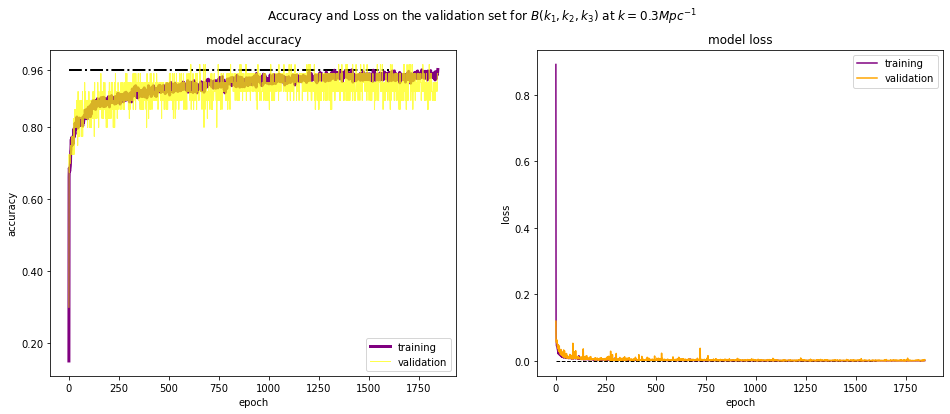

In [37]:
plt.figure(figsize=(16,6))

plt.suptitle(r'Accuracy and Loss on the validation set for $B(k_1,k_2,k_3)$ at $k =0.3Mpc^{-1}$')
plt.subplot(1,2,1)
#plt.hline()
c = list(np.arange(0,1,0.2))
c.append(0.96)
plt.yticks(c)
plt.plot(history.history['accuracy'],lw=3,color = 'purple')
plt.plot(history.history['val_accuracy'],lw=1,color='yellow',alpha=0.7)
plt.hlines(y = 0.96,xmin=0,xmax=1600,linestyles='dashdot',lw =2)

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='lower right')

# summarize history for loss
plt.subplot(1,2,2)

plt.plot(history.history['loss'],color = 'purple')
plt.plot(history.history['val_loss'],color='orange')
plt.hlines(y = 0,xmin=0,xmax=1600,linestyles='dashed',lw =1)
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='upper right')

In [38]:
model.save('bk0.21.h5')

In [ ]:
Bk_pdct = model.predict(params_test)
Bk_pdct.shape, len(Bk_pdct)  

In [ ]:
k1 = np.array([0.1903934])
#k1 = np.array([0.3220935, 1.559453 ])
k2byk1 = np.arange(0.50,1.05,0.05) 		#======Ratio k2byk1========#
cosalpha = np.arange(0.50,1.00,0.01)	#======cosine of the angle between the k2 and k1 arms =======#
k2byk1 = k2byk1.reshape(11,1)
k2byk1.shape

In [ ]:
Bk_ttest = np.zeros(shape=(len(Bk_pdct),11,50))
Bk_ppdct = np.zeros(shape=(len(Bk__02_test),11,50))
for i in range(len(Bk_pdct)):
    Bk_ppdct[i] = Bk_pdct[i].reshape(11,50)
    Bk_ttest[i] = Bk__02_test[i].reshape(11,50)

Bk_pdct = Bk_ppdct*100.
Bk_test = Bk_ttest

In [ ]:
cond = k2byk1*cosalpha
for i in range(len(Bk_pdct)):
    for j in range(len(k2byk1)):
        for k in range(50):
            if cond[j][k] < 0.50:
                Bk_pdct[i][j][k] = np.nan
                Bk_test[i][j][k] = np.nan

Bk_pdct = np.ma.masked_invalid(Bk_pdct)
Bk_test = np.ma.masked_invalid(Bk_test)

In [ ]:
def plot(index):
    plt.figure(figsize= (14,6))
    plt.tick_params(labelsize=10)

    plt.suptitle(r'At $k_1$ = {0:f}, $\zeta$ = {1:.2f}, $Rmfp$= {2:.2f}, $M_h$= {3:.2f}$\times 10^8 M_\odot$'.format(k1[0],params_test[index][0] , params_test[index][1] ,1.087*params_test[index][2]))
   
    plt.subplot(1,2,1)
    plt.title('Bispectrum')
    plt.pcolormesh(Bk_test[index],cmap="viridis")
    plt.colorbar(label=r"$\frac{k_1^3k_2^3Bk}{(2\pi^2)^2}$",)
    plt.xlabel(r'$cos(\alpha)$')
    plt.ylabel(r'$k_2/k_1$')   
    plt.subplot(1,2,2)
    plt.title('ANN prediction')
    plt.pcolormesh(Bk_pdct[index],cmap="viridis")
    plt.colorbar(label=r"$\frac{k_1^3k_2^3Bk}{(2\pi^2)^2}$",)
    plt.xlabel(r'$cos(\alpha)$')
    plt.ylabel(r'$k_2/k_1$') 

            

In [ ]:
interact(plot, index =(0,len(Bk_pdct)-1,1))

In [ ]:
Bk_test[24],params_test[24]

# Relative Error & percentage error between actual and predication 

In [ ]:
re = (Bk_pdct - Bk_test)/Bk_test

In [ ]:
re

In [ ]:
re

In [ ]:
model.save('Bk0.3New.h5')